In [4]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_labels.csv"
df_clusters = read.csv(filename, row.names = 1)

In [5]:
# load cluster summaries
cluster_summaries = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_summaries.csv", row.names=1)
colnames(cluster_summaries) = paste0("cluster",0:(ncol(cluster_summaries)-1))
head(cluster_summaries,2)

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11
HPSI0114i-bezi_3--DA--d30--0,-0.7098119,-0.7728862,0.4261967,0.3463025,0.06613719,-0.7754718,-0.002358341,0.8490074,0.6622714,-0.4312028,-0.5843867,0.110538034
HPSI0114i-bezi_3--DA--d30--1,-0.8473591,-0.9178856,0.5745484,0.4789874,0.06482869,-0.8300944,-0.012682349,0.9515093,0.5936949,-0.5913080,-0.7768382,-0.001228967


In [6]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
# Phenotype
phenotype_file = paste0(input_files_dir,"phenotype.csv")

In [7]:
df0 = read.csv(phenotype_file, row.names=1)
newcols = gsub("\\.","-",colnames(df0))
# head(newcols)
colnames(df0) = newcols
df0[1:5,1:5]

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [8]:
df1 = df0[,rownames(cluster_summaries)]
ncol(df0)
ncol(df1)
df1[1:5,1:5]

[1] 9219

[1] 8352

,HPSI0114i-bezi_3--DA--d30--0,HPSI0114i-bezi_3--DA--d30--1,HPSI0114i-bezi_3--DA--d30--10,HPSI0114i-bezi_3--DA--d30--11,HPSI0114i-bezi_3--DA--d30--12
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [9]:
rowsums = rowSums(df1)

In [10]:
# remove all 0 genes
zero_genes = names(rowsums[rowsums==0])
head(zero_genes)
length(zero_genes)

[1] "FAM138A"       "OR4F5"         "RP11.34P13.14" "OR4F29"       
[5] "RP5.857K21.2"  "OR4F16"

[1] 4476

In [11]:
non0_pseudocells = rowSums(df1>0)
head(non0_pseudocells)

MIR1302.10      FAM138A        OR4F5 RP11.34P13.7 RP11.34P13.8   AL627309.1 
          56            0            0          287           15          834

In [12]:
# remove genes in less 10% of pseudocells
low_genes = names(non0_pseudocells[non0_pseudocells<0.1*ncol(df1)])
head(low_genes)
length(low_genes)

[1] "MIR1302.10"   "FAM138A"      "OR4F5"        "RP11.34P13.7" "RP11.34P13.8"
[6] "AL627309.1"

[1] 19035

In [13]:
all_genes_df = df1

In [14]:
df1_new = df1[!(rownames(df1) %in% unique(c(zero_genes, low_genes))),]
nrow(df1_new)

[1] 13703

In [15]:
df1 = df1_new

In [16]:
genes = rownames(df1)
length(genes)
head(genes)

[1] 13703

[1] "AP006222.2"    "RP11.206L10.3" "RP11.206L10.9" "LINC00115"    
[5] "FAM41C"        "RP11.54O7.1"

In [17]:
cluster = 1

In [18]:
gene_list = c()
for (gene in genes){
    gene_list = c(gene_list, cor(as.numeric(df1[gene,]), cluster_summaries[,cluster+1]))
}
names(gene_list) = genes
gene_list = gene_list[order(gene_list, decreasing=T)]

In [19]:
length(gene_list)

[1] 13703

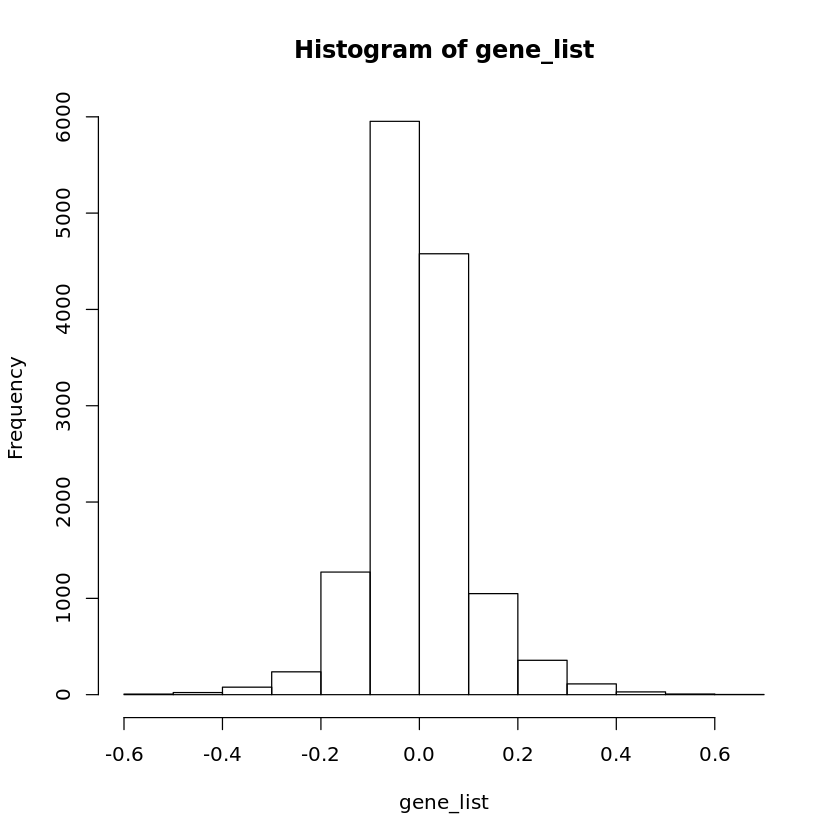

In [20]:
hist(gene_list)

In [21]:
df_corr = data.frame(gene = names(gene_list), corr_cluster1 = gene_list)
head(df_corr)

,gene,corr_cluster1
TMEM176B,TMEM176B,0.6122006
TMEM176A,TMEM176A,0.6035899
TPH1,TPH1,0.5967535
C6orf141,C6orf141,0.5663940
BCAM,BCAM,0.5562951
CHGA,CHGA,0.5509118


In [22]:
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster5.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster2.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster4.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster9.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster10.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster8.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster3.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster7.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster6.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster11.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster0.csv")
write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster1.csv")